## Module Import

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision.transforms.functional import to_pil_image
import torch.nn.functional as F
import matplotlib.pyplot as plt

## Dataset

In [2]:
BATCH_SIZE = 64
image_shape = (1, 28, 28)
EPOCH = 200
learning_rate = 0.0002
latent_dim = 100

In [3]:
custom_train_transform = transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

custom_test_transform = transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [4]:
train_dataset = MNIST(".", train=True, download=True, transform=custom_train_transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          drop_last=True,
                          num_workers=2)


test_dataset = MNIST(".", train=False, download=True, transform=custom_test_transform)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=2)

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459044803/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
img, label = train_dataset[0]
plt.title("label: " + str(label))
plt.imshow(to_pil_image(img), cmap='gray')
plt.show()

## Model

In [6]:
class Generator(nn.Module):
    def __init__(self, input_noise):
        super(Generator, self).__init__()
        
        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim, 256, normalize=False),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(image_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), *image_shape)
        return img

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(image_shape)), 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)

        return validity

## Training

In [8]:
adversarial_loss = torch.nn.BCELoss()

generator = Generator(latent_dim)
discriminator = Discriminator()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)

[Epoch 0/200] [D loss: 0.148170] [G loss: 8.003543]
Epoch: 0


[Epoch 1/200] [D loss: 0.445142] [G loss: 5.727671]
Epoch: 1


[Epoch 2/200] [D loss: 0.389835] [G loss: 3.153150]
Epoch: 2


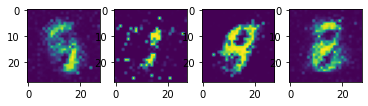

[Epoch 3/200] [D loss: 0.379824] [G loss: 4.555625]
Epoch: 3


[Epoch 4/200] [D loss: 0.709311] [G loss: 3.566392]
Epoch: 4


[Epoch 5/200] [D loss: 0.667636] [G loss: 1.372096]
Epoch: 5


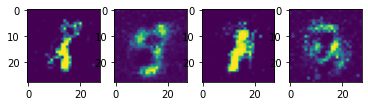

[Epoch 6/200] [D loss: 0.747423] [G loss: 2.718155]
Epoch: 6


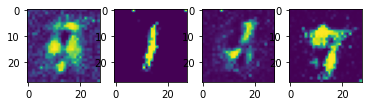

[Epoch 7/200] [D loss: 0.567334] [G loss: 1.971701]
Epoch: 7


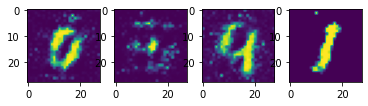

[Epoch 8/200] [D loss: 0.738277] [G loss: 1.973155]
Epoch: 8


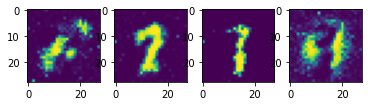

[Epoch 9/200] [D loss: 0.898379] [G loss: 1.985736]
Epoch: 9


[Epoch 10/200] [D loss: 0.661665] [G loss: 1.868911]
Epoch: 10


[Epoch 11/200] [D loss: 0.953864] [G loss: 1.893086]
Epoch: 11


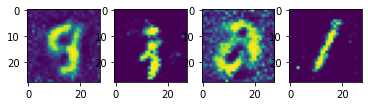

[Epoch 12/200] [D loss: 1.101650] [G loss: 1.440638]
Epoch: 12


[Epoch 13/200] [D loss: 0.718098] [G loss: 1.890483]
Epoch: 13


[Epoch 14/200] [D loss: 1.350523] [G loss: 0.811056]
Epoch: 14


[Epoch 15/200] [D loss: 1.206258] [G loss: 1.048207]
Epoch: 15


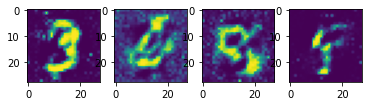

[Epoch 16/200] [D loss: 1.060677] [G loss: 0.949930]
Epoch: 16


[Epoch 17/200] [D loss: 1.128502] [G loss: 1.136742]
Epoch: 17


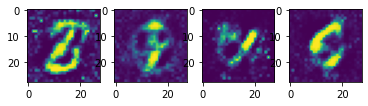

[Epoch 18/200] [D loss: 0.868617] [G loss: 1.807433]
Epoch: 18


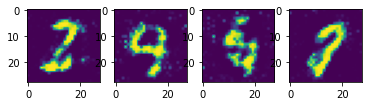

[Epoch 19/200] [D loss: 1.105335] [G loss: 1.219171]
Epoch: 19


[Epoch 20/200] [D loss: 0.919642] [G loss: 1.505905]
Epoch: 20


[Epoch 21/200] [D loss: 0.918097] [G loss: 1.252387]
Epoch: 21


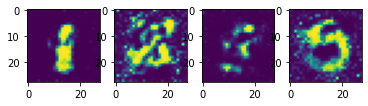

[Epoch 22/200] [D loss: 1.086301] [G loss: 1.317273]
Epoch: 22


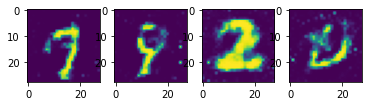

[Epoch 23/200] [D loss: 0.813801] [G loss: 1.222019]
Epoch: 23


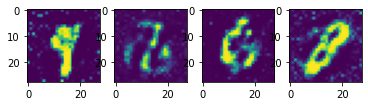

[Epoch 24/200] [D loss: 0.715531] [G loss: 2.064874]
Epoch: 24


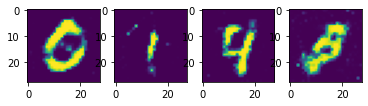

[Epoch 25/200] [D loss: 1.020457] [G loss: 1.529500]
Epoch: 25


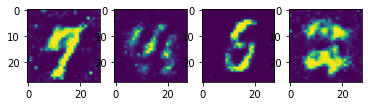

[Epoch 26/200] [D loss: 1.195807] [G loss: 0.968326]
Epoch: 26


[Epoch 27/200] [D loss: 1.052973] [G loss: 0.979526]
Epoch: 27


[Epoch 28/200] [D loss: 1.106929] [G loss: 1.338984]
Epoch: 28


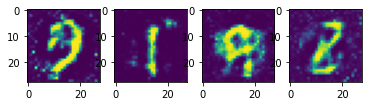

[Epoch 29/200] [D loss: 1.049663] [G loss: 1.527785]
Epoch: 29


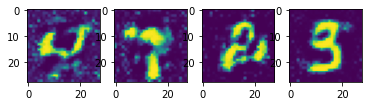

[Epoch 30/200] [D loss: 0.994774] [G loss: 1.275708]
Epoch: 30


[Epoch 31/200] [D loss: 1.048797] [G loss: 1.266169]
Epoch: 31


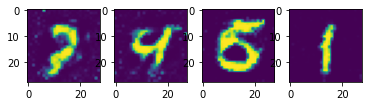

[Epoch 32/200] [D loss: 0.921296] [G loss: 1.254440]
Epoch: 32


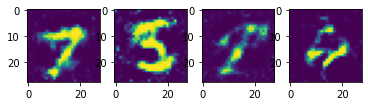

[Epoch 33/200] [D loss: 1.095314] [G loss: 1.056569]
Epoch: 33


[Epoch 34/200] [D loss: 1.261291] [G loss: 0.908720]
Epoch: 34


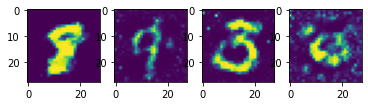

[Epoch 35/200] [D loss: 1.165293] [G loss: 0.891079]
Epoch: 35


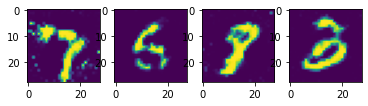

[Epoch 36/200] [D loss: 1.105172] [G loss: 0.894062]
Epoch: 36


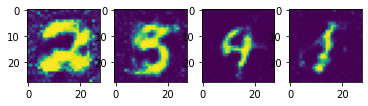

[Epoch 37/200] [D loss: 1.055923] [G loss: 1.043292]
Epoch: 37


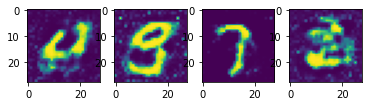

[Epoch 38/200] [D loss: 1.557491] [G loss: 0.958681]
Epoch: 38


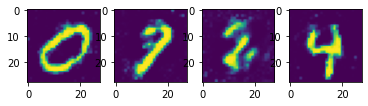

[Epoch 39/200] [D loss: 1.087908] [G loss: 1.286408]
Epoch: 39


[Epoch 40/200] [D loss: 1.191281] [G loss: 1.210760]
Epoch: 40


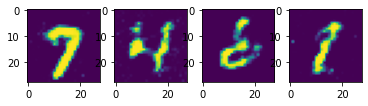

[Epoch 41/200] [D loss: 1.070045] [G loss: 0.973574]
Epoch: 41


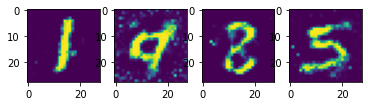

[Epoch 42/200] [D loss: 1.075856] [G loss: 1.064640]
Epoch: 42


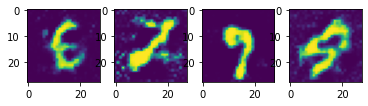

[Epoch 43/200] [D loss: 1.364880] [G loss: 0.933434]
Epoch: 43


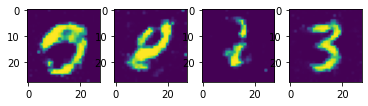

[Epoch 44/200] [D loss: 1.269556] [G loss: 0.884615]
Epoch: 44


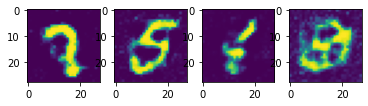

[Epoch 45/200] [D loss: 1.037054] [G loss: 1.127057]
Epoch: 45


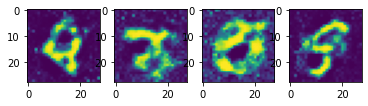

[Epoch 46/200] [D loss: 1.217451] [G loss: 1.107906]
Epoch: 46


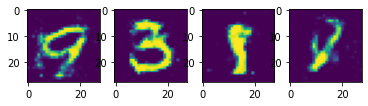

[Epoch 47/200] [D loss: 1.140583] [G loss: 1.026667]
Epoch: 47


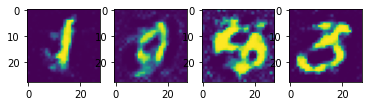

[Epoch 48/200] [D loss: 1.149436] [G loss: 0.854160]
Epoch: 48


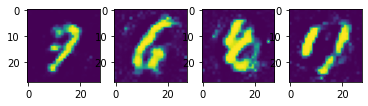

[Epoch 49/200] [D loss: 1.311829] [G loss: 1.069324]
Epoch: 49


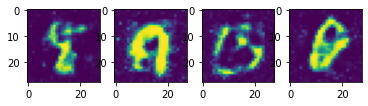

[Epoch 50/200] [D loss: 1.084792] [G loss: 1.063192]
Epoch: 50


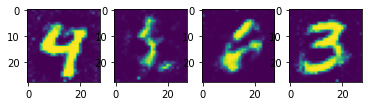

[Epoch 51/200] [D loss: 1.377493] [G loss: 0.835357]
Epoch: 51


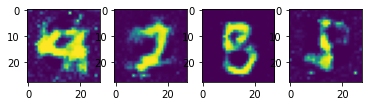

[Epoch 52/200] [D loss: 1.346699] [G loss: 1.036594]
Epoch: 52


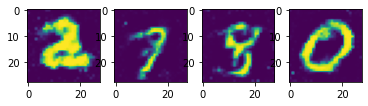

[Epoch 53/200] [D loss: 1.091217] [G loss: 1.135506]
Epoch: 53


[Epoch 54/200] [D loss: 1.157490] [G loss: 1.033531]
Epoch: 54


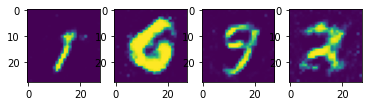

[Epoch 55/200] [D loss: 1.292548] [G loss: 0.825219]
Epoch: 55


[Epoch 56/200] [D loss: 1.098400] [G loss: 1.012651]
Epoch: 56


[Epoch 57/200] [D loss: 1.142740] [G loss: 0.916935]
Epoch: 57


[Epoch 58/200] [D loss: 1.342041] [G loss: 0.981825]
Epoch: 58


[Epoch 59/200] [D loss: 1.250071] [G loss: 0.926526]
Epoch: 59


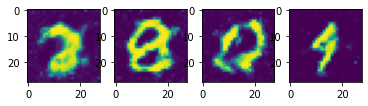

[Epoch 60/200] [D loss: 1.275791] [G loss: 0.973557]
Epoch: 60


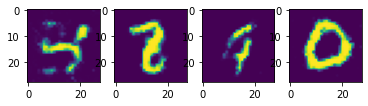

[Epoch 61/200] [D loss: 1.221379] [G loss: 1.133548]
Epoch: 61


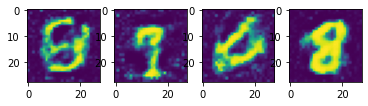

[Epoch 62/200] [D loss: 1.330608] [G loss: 0.819376]
Epoch: 62


[Epoch 63/200] [D loss: 1.355466] [G loss: 0.876987]
Epoch: 63


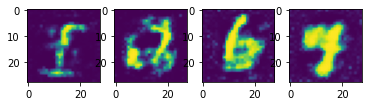

[Epoch 64/200] [D loss: 1.038117] [G loss: 1.110753]
Epoch: 64


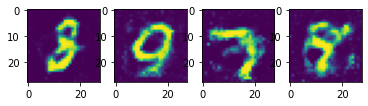

[Epoch 65/200] [D loss: 1.144220] [G loss: 0.896021]
Epoch: 65


[Epoch 66/200] [D loss: 1.264392] [G loss: 1.002510]
Epoch: 66


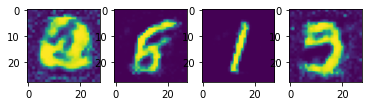

[Epoch 67/200] [D loss: 1.269102] [G loss: 0.869514]
Epoch: 67


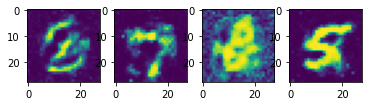

[Epoch 68/200] [D loss: 1.217102] [G loss: 0.794145]
Epoch: 68


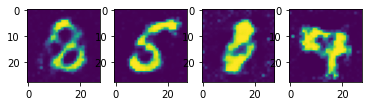

[Epoch 69/200] [D loss: 1.225736] [G loss: 0.935427]
Epoch: 69


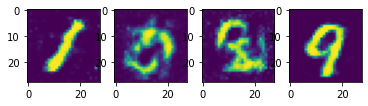

[Epoch 70/200] [D loss: 1.037272] [G loss: 1.322216]
Epoch: 70


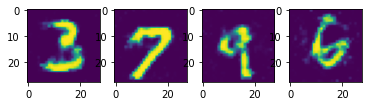

[Epoch 71/200] [D loss: 1.233381] [G loss: 0.952541]
Epoch: 71


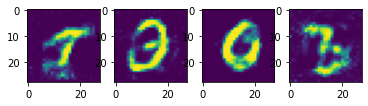

[Epoch 72/200] [D loss: 1.161515] [G loss: 0.979787]
Epoch: 72


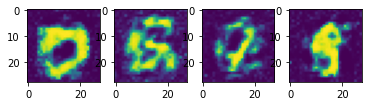

[Epoch 73/200] [D loss: 1.266644] [G loss: 1.190191]
Epoch: 73


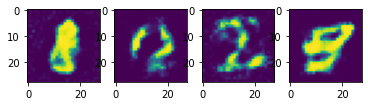

[Epoch 74/200] [D loss: 1.353876] [G loss: 0.814657]
Epoch: 74


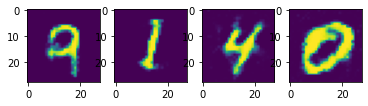

[Epoch 75/200] [D loss: 1.046141] [G loss: 1.015313]
Epoch: 75


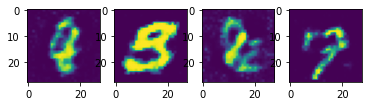

[Epoch 76/200] [D loss: 1.292640] [G loss: 0.866240]
Epoch: 76


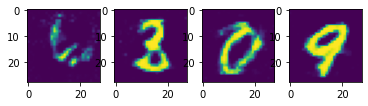

[Epoch 77/200] [D loss: 1.145927] [G loss: 0.987662]
Epoch: 77


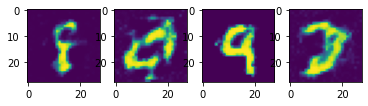

[Epoch 78/200] [D loss: 1.224591] [G loss: 0.994743]
Epoch: 78


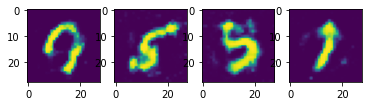

[Epoch 79/200] [D loss: 1.224967] [G loss: 0.980061]
Epoch: 79


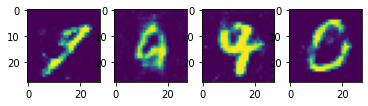

[Epoch 80/200] [D loss: 1.218206] [G loss: 1.194732]
Epoch: 80


[Epoch 81/200] [D loss: 1.234494] [G loss: 0.933198]
Epoch: 81


[Epoch 82/200] [D loss: 1.061883] [G loss: 1.365696]
Epoch: 82


[Epoch 83/200] [D loss: 1.180011] [G loss: 0.847144]
Epoch: 83


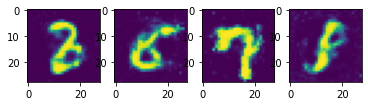

[Epoch 84/200] [D loss: 1.249729] [G loss: 0.997037]
Epoch: 84


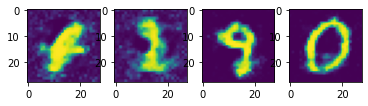

[Epoch 85/200] [D loss: 1.177414] [G loss: 0.920253]
Epoch: 85


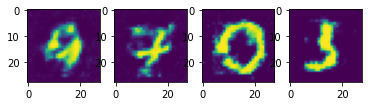

[Epoch 86/200] [D loss: 1.183909] [G loss: 0.967939]
Epoch: 86


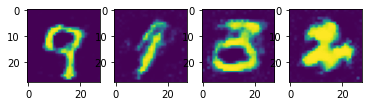

[Epoch 87/200] [D loss: 1.118240] [G loss: 1.213809]
Epoch: 87


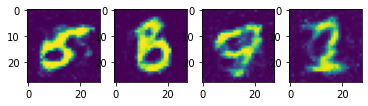

[Epoch 88/200] [D loss: 1.308571] [G loss: 0.851177]
Epoch: 88


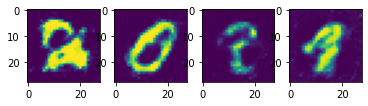

[Epoch 89/200] [D loss: 1.203406] [G loss: 0.858379]
Epoch: 89


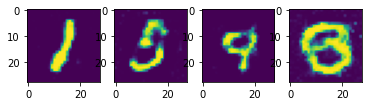

[Epoch 90/200] [D loss: 1.059163] [G loss: 1.051011]
Epoch: 90


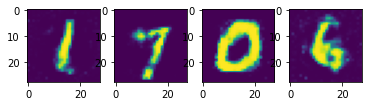

[Epoch 91/200] [D loss: 1.211385] [G loss: 1.129332]
Epoch: 91


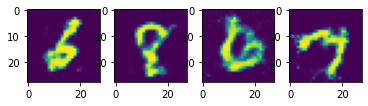

[Epoch 92/200] [D loss: 1.192020] [G loss: 0.989758]
Epoch: 92


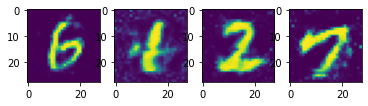

[Epoch 93/200] [D loss: 1.103663] [G loss: 1.056660]
Epoch: 93


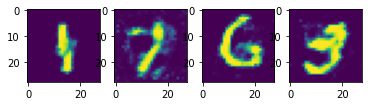

[Epoch 94/200] [D loss: 1.193006] [G loss: 0.920995]
Epoch: 94


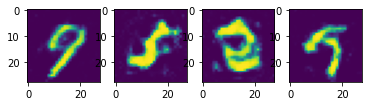

[Epoch 95/200] [D loss: 1.242323] [G loss: 0.896815]
Epoch: 95


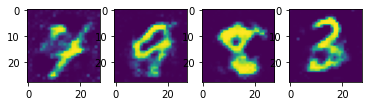

[Epoch 96/200] [D loss: 1.199075] [G loss: 0.887310]
Epoch: 96


[Epoch 97/200] [D loss: 1.390042] [G loss: 0.853818]
Epoch: 97


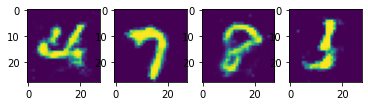

[Epoch 98/200] [D loss: 1.324103] [G loss: 0.734774]
Epoch: 98


[Epoch 99/200] [D loss: 1.089393] [G loss: 0.849080]
Epoch: 99


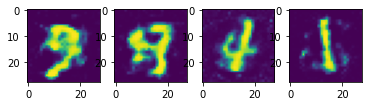

[Epoch 100/200] [D loss: 1.394224] [G loss: 0.980657]
Epoch: 100


[Epoch 101/200] [D loss: 1.338389] [G loss: 0.731766]
Epoch: 101


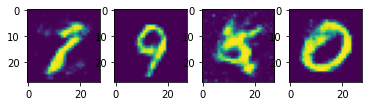

[Epoch 102/200] [D loss: 1.286278] [G loss: 0.909346]
Epoch: 102


[Epoch 103/200] [D loss: 1.194369] [G loss: 1.129557]
Epoch: 103


[Epoch 104/200] [D loss: 1.100662] [G loss: 1.161898]
Epoch: 104


[Epoch 105/200] [D loss: 1.261649] [G loss: 0.840792]
Epoch: 105


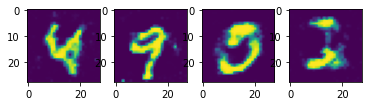

[Epoch 106/200] [D loss: 1.169727] [G loss: 0.912210]
Epoch: 106


[Epoch 107/200] [D loss: 1.158733] [G loss: 0.976002]
Epoch: 107


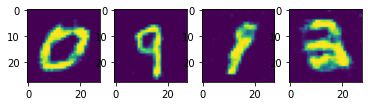

[Epoch 108/200] [D loss: 1.207487] [G loss: 1.046531]
Epoch: 108


[Epoch 109/200] [D loss: 1.302691] [G loss: 0.909769]
Epoch: 109


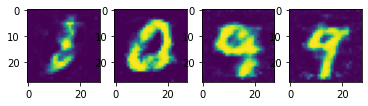

[Epoch 110/200] [D loss: 1.171306] [G loss: 1.024361]
Epoch: 110


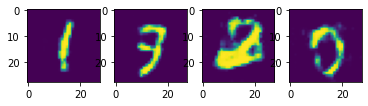

[Epoch 111/200] [D loss: 1.454071] [G loss: 0.772203]
Epoch: 111


[Epoch 112/200] [D loss: 1.286292] [G loss: 0.810805]
Epoch: 112


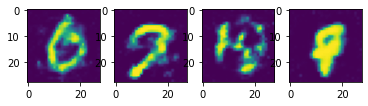

[Epoch 113/200] [D loss: 1.056427] [G loss: 1.079522]
Epoch: 113


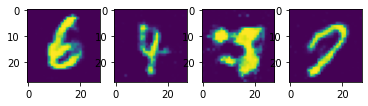

[Epoch 114/200] [D loss: 1.230561] [G loss: 1.006680]
Epoch: 114


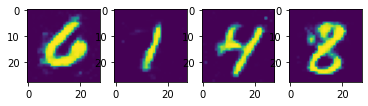

[Epoch 115/200] [D loss: 1.228158] [G loss: 0.944592]
Epoch: 115


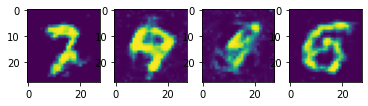

[Epoch 116/200] [D loss: 1.303699] [G loss: 0.911161]
Epoch: 116


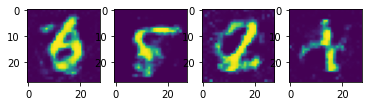

[Epoch 117/200] [D loss: 1.082919] [G loss: 1.055298]
Epoch: 117


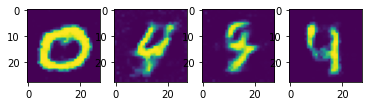

[Epoch 118/200] [D loss: 1.263909] [G loss: 0.913039]
Epoch: 118


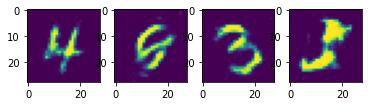

[Epoch 119/200] [D loss: 1.275384] [G loss: 0.965291]
Epoch: 119


[Epoch 120/200] [D loss: 1.154742] [G loss: 1.052223]
Epoch: 120


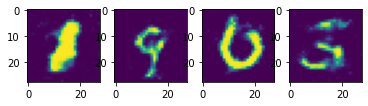

[Epoch 121/200] [D loss: 1.220590] [G loss: 0.996145]
Epoch: 121


[Epoch 122/200] [D loss: 1.136163] [G loss: 1.088316]
Epoch: 122


[Epoch 123/200] [D loss: 1.106021] [G loss: 1.177573]
Epoch: 123


[Epoch 124/200] [D loss: 1.236426] [G loss: 0.888424]
Epoch: 124


[Epoch 125/200] [D loss: 1.306375] [G loss: 0.910413]
Epoch: 125


[Epoch 126/200] [D loss: 1.293291] [G loss: 0.959886]
Epoch: 126


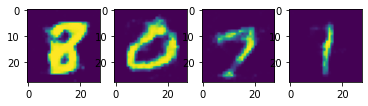

[Epoch 127/200] [D loss: 1.271838] [G loss: 0.742236]
Epoch: 127


[Epoch 128/200] [D loss: 1.228931] [G loss: 0.884510]
Epoch: 128


[Epoch 129/200] [D loss: 1.321622] [G loss: 0.896881]
Epoch: 129


[Epoch 130/200] [D loss: 1.257536] [G loss: 0.796703]
Epoch: 130


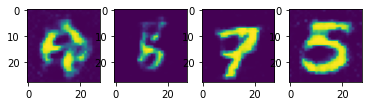

[Epoch 131/200] [D loss: 1.258403] [G loss: 0.900389]
Epoch: 131


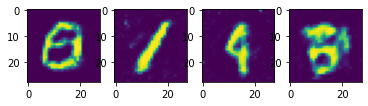

[Epoch 132/200] [D loss: 1.229717] [G loss: 0.905106]
Epoch: 132


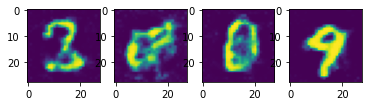

[Epoch 133/200] [D loss: 1.283915] [G loss: 0.806421]
Epoch: 133


[Epoch 134/200] [D loss: 1.213368] [G loss: 1.030914]
Epoch: 134


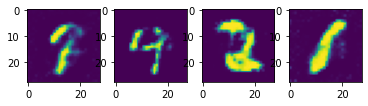

[Epoch 135/200] [D loss: 1.230795] [G loss: 1.027927]
Epoch: 135


[Epoch 136/200] [D loss: 1.260593] [G loss: 1.066651]
Epoch: 136


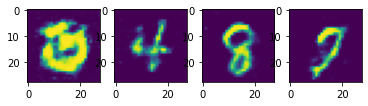

[Epoch 137/200] [D loss: 1.135864] [G loss: 0.931344]
Epoch: 137


[Epoch 138/200] [D loss: 1.202752] [G loss: 0.970892]
Epoch: 138


[Epoch 139/200] [D loss: 1.220315] [G loss: 0.968190]
Epoch: 139


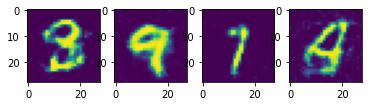

[Epoch 140/200] [D loss: 1.324931] [G loss: 0.768720]
Epoch: 140


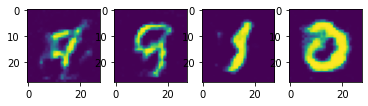

[Epoch 141/200] [D loss: 1.295928] [G loss: 1.045946]
Epoch: 141


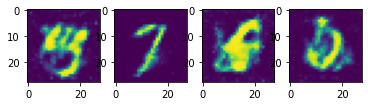

[Epoch 142/200] [D loss: 1.350858] [G loss: 0.847102]
Epoch: 142


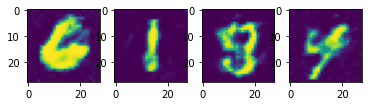

[Epoch 143/200] [D loss: 1.291946] [G loss: 0.981490]
Epoch: 143


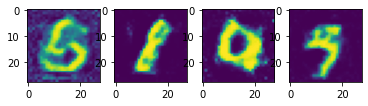

[Epoch 144/200] [D loss: 1.276159] [G loss: 0.960139]
Epoch: 144


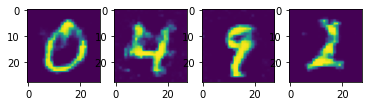

[Epoch 145/200] [D loss: 1.310898] [G loss: 0.895565]
Epoch: 145


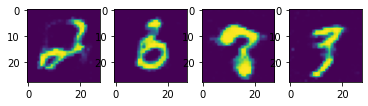

[Epoch 146/200] [D loss: 1.277028] [G loss: 0.957823]
Epoch: 146


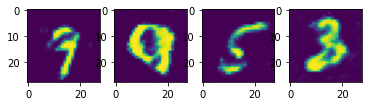

[Epoch 147/200] [D loss: 1.416890] [G loss: 0.927233]
Epoch: 147


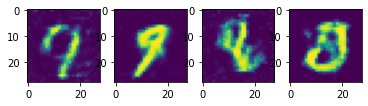

[Epoch 148/200] [D loss: 1.351937] [G loss: 0.864670]
Epoch: 148


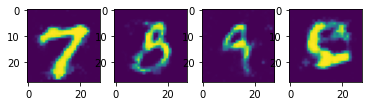

[Epoch 149/200] [D loss: 1.213179] [G loss: 0.791262]
Epoch: 149


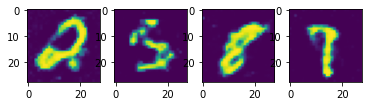

[Epoch 150/200] [D loss: 1.341220] [G loss: 0.855025]
Epoch: 150


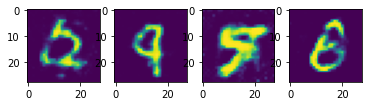

[Epoch 151/200] [D loss: 1.191165] [G loss: 0.890973]
Epoch: 151


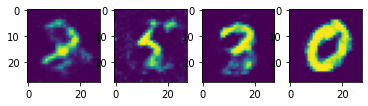

[Epoch 152/200] [D loss: 1.192566] [G loss: 1.062299]
Epoch: 152


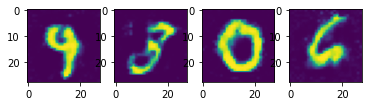

[Epoch 153/200] [D loss: 1.214880] [G loss: 1.084007]
Epoch: 153


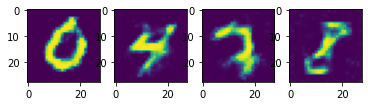

[Epoch 154/200] [D loss: 1.317203] [G loss: 0.981215]
Epoch: 154


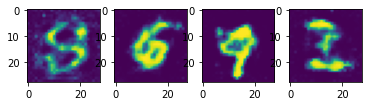

[Epoch 155/200] [D loss: 1.300473] [G loss: 1.028036]
Epoch: 155


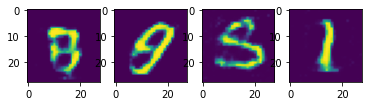

[Epoch 156/200] [D loss: 1.229503] [G loss: 0.849308]
Epoch: 156


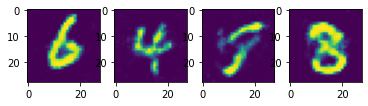

[Epoch 157/200] [D loss: 1.177584] [G loss: 0.935214]
Epoch: 157


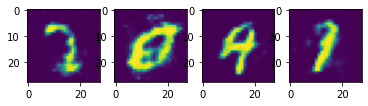

[Epoch 158/200] [D loss: 1.159817] [G loss: 1.052299]
Epoch: 158


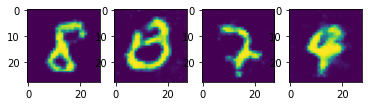

[Epoch 159/200] [D loss: 1.257749] [G loss: 0.800363]
Epoch: 159


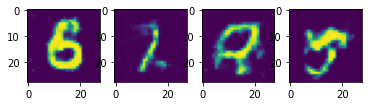

[Epoch 160/200] [D loss: 1.193937] [G loss: 0.817795]
Epoch: 160


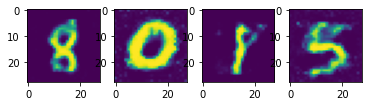

[Epoch 161/200] [D loss: 1.226842] [G loss: 1.078230]
Epoch: 161


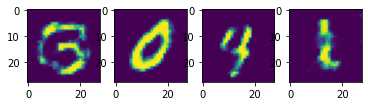

[Epoch 162/200] [D loss: 1.299566] [G loss: 0.936225]
Epoch: 162


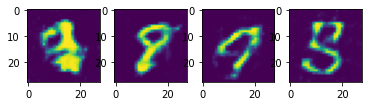

[Epoch 163/200] [D loss: 1.204917] [G loss: 0.902534]
Epoch: 163


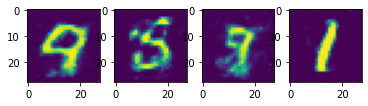

[Epoch 164/200] [D loss: 1.275525] [G loss: 0.918916]
Epoch: 164


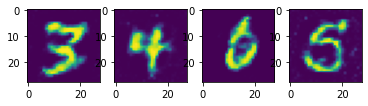

[Epoch 165/200] [D loss: 1.220716] [G loss: 0.950955]
Epoch: 165


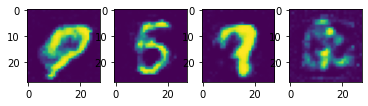

[Epoch 166/200] [D loss: 1.165209] [G loss: 0.916857]
Epoch: 166


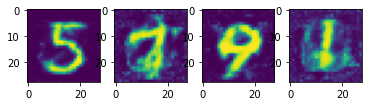

[Epoch 167/200] [D loss: 1.218833] [G loss: 0.848271]
Epoch: 167


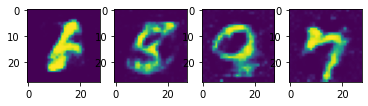

[Epoch 168/200] [D loss: 1.339819] [G loss: 0.827327]
Epoch: 168


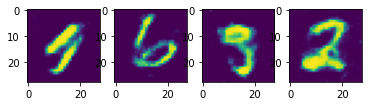

[Epoch 169/200] [D loss: 1.185175] [G loss: 1.063268]
Epoch: 169


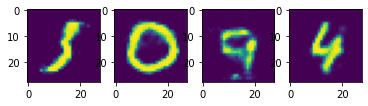

[Epoch 170/200] [D loss: 1.293338] [G loss: 0.898848]
Epoch: 170


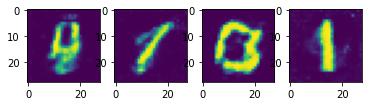

[Epoch 171/200] [D loss: 1.271244] [G loss: 0.895516]
Epoch: 171


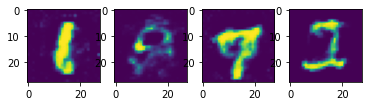

[Epoch 172/200] [D loss: 1.260479] [G loss: 0.856838]
Epoch: 172


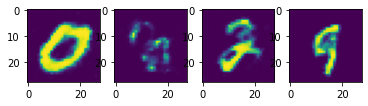

[Epoch 173/200] [D loss: 1.191788] [G loss: 1.110100]
Epoch: 173


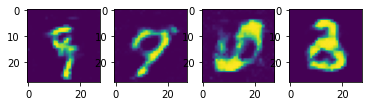

[Epoch 174/200] [D loss: 1.311480] [G loss: 0.852762]
Epoch: 174


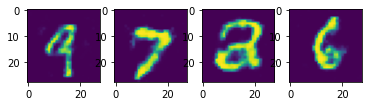

[Epoch 175/200] [D loss: 1.298694] [G loss: 0.901839]
Epoch: 175


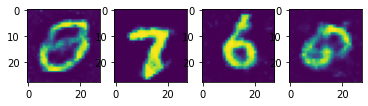

[Epoch 176/200] [D loss: 1.251354] [G loss: 0.875541]
Epoch: 176


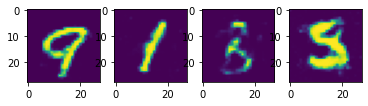

[Epoch 177/200] [D loss: 1.111847] [G loss: 0.944330]
Epoch: 177


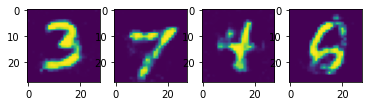

[Epoch 178/200] [D loss: 1.155783] [G loss: 1.034661]
Epoch: 178


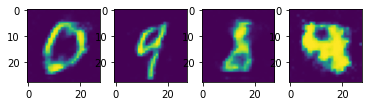

[Epoch 179/200] [D loss: 1.359107] [G loss: 0.951520]
Epoch: 179


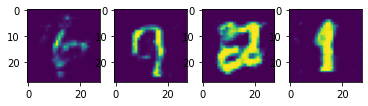

[Epoch 180/200] [D loss: 1.210273] [G loss: 1.007098]
Epoch: 180


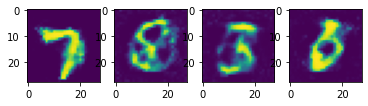

[Epoch 181/200] [D loss: 1.435658] [G loss: 0.824534]
Epoch: 181


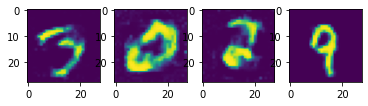

[Epoch 182/200] [D loss: 1.287106] [G loss: 1.049071]
Epoch: 182


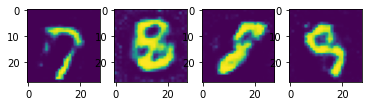

[Epoch 183/200] [D loss: 1.162654] [G loss: 0.974569]
Epoch: 183


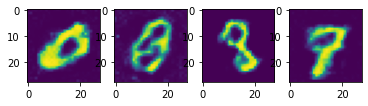

[Epoch 184/200] [D loss: 1.233419] [G loss: 0.835712]
Epoch: 184


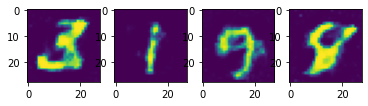

[Epoch 185/200] [D loss: 1.351086] [G loss: 0.886187]
Epoch: 185


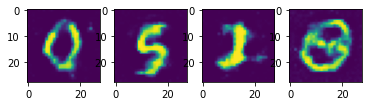

[Epoch 186/200] [D loss: 1.292147] [G loss: 0.768371]
Epoch: 186


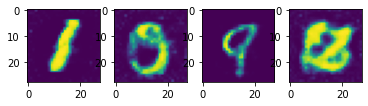

[Epoch 187/200] [D loss: 1.238576] [G loss: 0.990672]
Epoch: 187


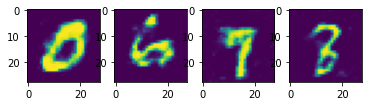

[Epoch 188/200] [D loss: 1.279041] [G loss: 0.838104]
Epoch: 188


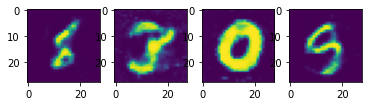

[Epoch 189/200] [D loss: 1.307793] [G loss: 0.854082]
Epoch: 189


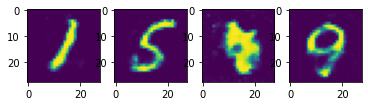

[Epoch 190/200] [D loss: 1.230910] [G loss: 0.863410]
Epoch: 190


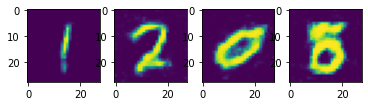

[Epoch 191/200] [D loss: 1.368076] [G loss: 0.989581]
Epoch: 191


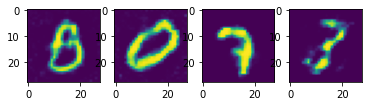

[Epoch 192/200] [D loss: 1.209251] [G loss: 0.994927]
Epoch: 192


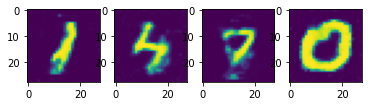

[Epoch 193/200] [D loss: 1.230945] [G loss: 0.964844]
Epoch: 193


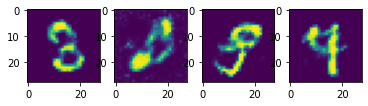

[Epoch 194/200] [D loss: 1.415427] [G loss: 0.912059]
Epoch: 194


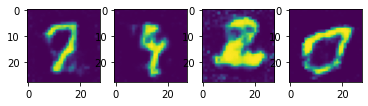

[Epoch 195/200] [D loss: 1.295149] [G loss: 0.920384]
Epoch: 195


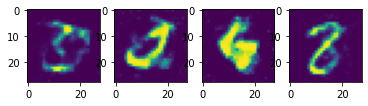

[Epoch 196/200] [D loss: 1.217438] [G loss: 0.985562]
Epoch: 196


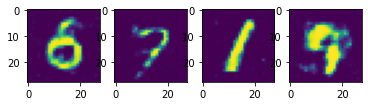

[Epoch 197/200] [D loss: 1.293187] [G loss: 0.735934]
Epoch: 197


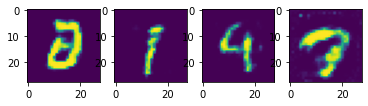

[Epoch 198/200] [D loss: 1.250453] [G loss: 0.944817]
Epoch: 198


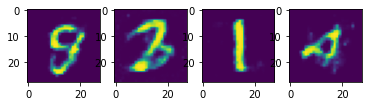

[Epoch 199/200] [D loss: 1.243114] [G loss: 0.958728]
Epoch: 199


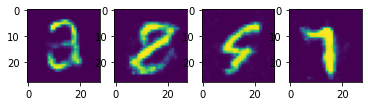

In [9]:
batch_count = 0

Tensor = torch.FloatTensor

for epoch in range(EPOCH):
    for i, (imgs, _) in enumerate(train_loader):
        valid = Variable(Tensor(imgs.size(0), 1).fill_(1.0), requires_grad=False)
        fake = Variable(Tensor(imgs.size(0), 1).fill_(0.0), requires_grad=False)
        
        # Configure input
        real_imgs = Variable(imgs.type(Tensor))
        
        # Train Generator
        optimizer_G.zero_grad()
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], latent_dim))))
        
        gen_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)

        g_loss.backward()
        optimizer_G.step()
        
        # Train Discriminator
        optimizer_D.zero_grad()

        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss)

        d_loss.backward()
        optimizer_D.step()
    print(
        "[Epoch %d/%d] [D loss: %f] [G loss: %f]"
        % (epoch, EPOCH, d_loss.item(), g_loss.item())
    )
    
    print("Epoch:", epoch)
    fig, axes = plt.subplots(1, 4)
    z = Variable(Tensor(np.random.normal(0, 1, (4, latent_dim))))
    gen_imgs = generator(z)

    for i in range(4):
        axes[i].imshow(gen_imgs.detach().numpy()[i][0])

    plt.show()

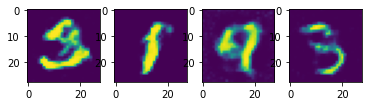

In [10]:
fig, axes = plt.subplots(1, 4)
z = Variable(Tensor(np.random.normal(0, 1, (4, latent_dim))))
gen_imgs = generator(z)

for i in range(4):
    axes[i].imshow(gen_imgs.detach().numpy()[i][0])

plt.show()

In [11]:
PATH = './weights_gan/'

torch.save(generator, PATH + 'generator.pt')  # 전체 모델 저장
torch.save(generator.state_dict(), PATH + 'generator_state_dict.pt')  # 모델 객체의 state_dict 저장
torch.save(discriminator, PATH + 'discriminator.pt')  # 전체 모델 저장
torch.save(discriminator.state_dict(), PATH + 'discriminator_state_dict.pt')  # 모델 객체의 state_dict 저장
torch.save({
    'generator': generator.state_dict(),
    'discriminator': discriminator.state_dict(),
    'optimizer_G': optimizer_G.state_dict(),
    'optimizer_D': optimizer_D.state_dict()
}, PATH + 'all.tar')